In [9]:
using Revise
using Laplacians
using Pkg
@show Pkg.pathof(Laplacians)
using SparseArrays
using LinearAlgebra

using Dates
using MATLAB

Pkg.pathof(Laplacians) = "/Users/rjkyng/Dropbox/Repos/Laplacians.jl/src/Laplacians.jl"


In [10]:
pwd()

"/Users/rjkyng/Dropbox/Repos/Laplacians.jl/devel"

In [3]:
ni = 100

100

In [4]:
b = randn(ni);

In [5]:
output_filename = "hypre_vec1"

"hypre_vec1"

In [6]:
includet("../compare/hypreExport.jl")

In [8]:
hypreExportVector(output_filename,b)


                            < M A T L A B (R) >
                  Copyright 1984-2018 The MathWorks, Inc.
                   R2018b (9.5.0.944444) 64-bit (maci64)
                              August 28, 2018

 
For online documentation, see https://www.mathworks.com/support
For product information, visit www.mathworks.com.
 
>> >> >> >> >> /Users/rjkyng/Dropbox/Repos/Laplacians.jl/devel
>> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> Generating file: hypre_vec1.0
Generating INFO file: hypre_vec1.INFO.0
Generating file: hypre_vec1.1
Generating INFO file: hypre_vec1.INFO.1
>> >> 

Process(`/Applications/MATLAB_R2018b.app/bin/matlab -nojvm '<' /Users/rjkyng/Dropbox/Repos/Laplacians.jl/src/../hypre/matlab2hypreParVectorsScript.m`, ProcessExited(0))

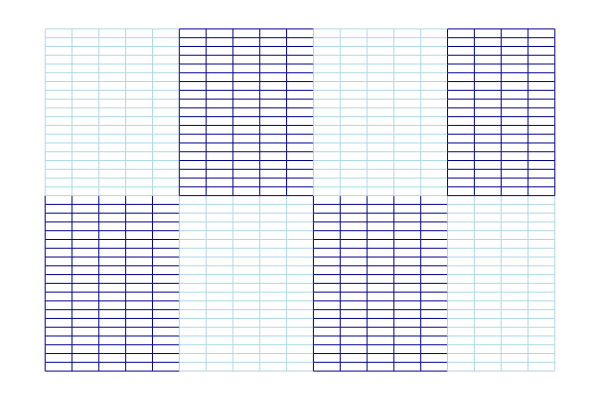

  0.648781 seconds (1.05 M allocations: 52.134 MiB, 2.12% gc time)
  0.256948 seconds (175.64 k allocations: 8.992 MiB, 50.48% gc time)
  0.176649 seconds (364.43 k allocations: 17.523 MiB, 5.02% gc time)
  0.308871 seconds (620.39 k allocations: 30.079 MiB, 2.75% gc time)


In [11]:
s1 = 20
s2 = 40
n = s1*s2
weight = 1e6
blocks1 = 4
blocks2 = 2
@time A = ggrid2_checkered(s1,s2,blocks1,blocks2,weight) # create the adjacency matrix
(x,y) = ggrid2coords(s1,s2);
p = plot_graph_weighted(A,x,y;dots=false);
@time L = lap(A) # create the Laplacian
bot = 1:s1
top = n-s1+1:n
left = s1+1:s1:n-s1
right = 2*s1:s1:n-1
bndry = [bot; top; left; right]
@time int = setdiff(1:n,bndry) # the interior variables (= all - boundary )

@time M = L[int,int]
# remove the rows and colums corresponding to the boundary of the grid
# -- this is because we essentially want to force boundary voltages to be zero

ni = length(int) #this is the remaining variables

b = randn(ni);

In [21]:
    mf = MatFile("julia2matlab2hypre_matrix.mat","w")
    put_variable(mf, "A", M)
    put_variable(mf, "b", b)
    put_variable(mf, "tol", tol)
    put_variable(mf, "maxits", maxits)
    put_variable(mf, "num_procs", 2)
    put_variable(mf, "output_filename", "hypreMatrixTestOut")
    close(mf)

In [22]:
tol = 1e-8
maxits = 1000

1000

In [25]:
    mf = MatFile("julia2matlab2hypre_matrixvector.mat","w")
    put_variable(mf, "A", M)
    put_variable(mf, "b", b)
    put_variable(mf, "tol", tol)
    put_variable(mf, "maxits", maxits)
    put_variable(mf, "num_procs", 2)
    put_variable(mf, "output_filename_matrix", "hypreTestMatrix1")
    put_variable(mf, "output_filename_vector", "hypreTestVector1")
    close(mf)

In [26]:
pwd()

"/Users/rjkyng/Dropbox/Repos/Laplacians.jl/devel"

In [27]:
size(M)

(684, 684)

In [29]:
size(b)

(684,)

In [32]:
matname = "hypreTestMatrix1"
vecname = "hypreTestVector1"
hypreExportMatrixVector(matname,M,vecname,b)


                            < M A T L A B (R) >
                  Copyright 1984-2018 The MathWorks, Inc.
                   R2018b (9.5.0.944444) 64-bit (maci64)
                              August 28, 2018

 
For online documentation, see https://www.mathworks.com/support
For product information, visit www.mathworks.com.
 
>> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> Generating file: hypreTestMatrix1.00000
Generating file: hypreTestMatrix1.00001
>> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> >> Generating file: hypreTestVector1.0
Generating INFO file: hypreTestVector1.INFO.0
Generating file: hypreTestVector1.1
Generating INFO file: hypreTestVector1.INFO.1
>> >> >> >> 

Process(`/Applications/MATLAB_R2018b.app/bin/matlab -nojvm '<' /Users/rjkyng/Dropbox/Repos/Laplacians.jl/src/../hypre/matlab2hypreMatrixVectorScript.m`, ProcessExited(0))